Part 1 – Basic Data Understanding (Pandas)

Load the dataset and display the first 10 rows.

In [1]:
import pandas as pd
df=pd.read_csv('bestsellers with categories.csv')
df.head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction


In [2]:
df.shape

(550, 7)

In [3]:
df.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In [4]:
df.dtypes

Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object

Check for missing values and duplicates.

In [5]:
missing=df.isnull().sum()
print(missing)


Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64


In [6]:
duplicates=df.duplicated().sum()
print(duplicates)

0


Use .describe() for numeric columns.

In [7]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


Get the number of unique authors.

In [8]:
df.value_counts('Author')

Author
Jeff Kinney                           12
Gary Chapman                          11
Rick Riordan                          11
Suzanne Collins                       11
American Psychological Association    10
                                      ..
Thomas Piketty                         1
The Washington Post                    1
Tina Fey                               1
W. Cleon Skousen                       1
Tucker Carlson                         1
Name: count, Length: 248, dtype: int64

In [9]:
print(df["Author"].nunique())

248


Find the most common genre.

In [10]:
df["Genre"].value_counts().idxmax()

'Non Fiction'

Display the book with the highest price.


In [11]:
book_name = df.loc[df["Price"].idxmax(), "Name"]
print(book_name)

Diagnostic and Statistical Manual of Mental Disorders, 5th Edition: DSM-5


Part 2 – EDA (Exploratory Data Analysis)

Histogram of User Rating.

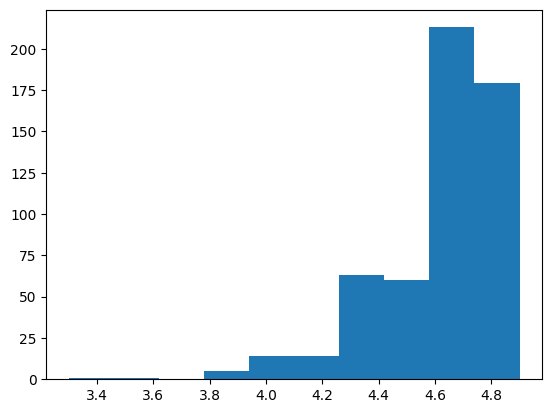

In [12]:
import matplotlib.pyplot as plt
plt.hist(df['User Rating'])
plt.show()

Histogram of Price.

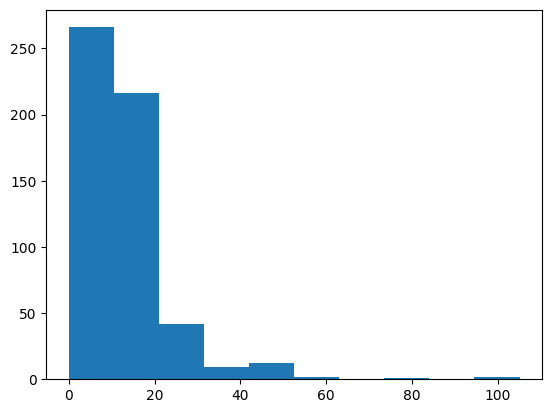

In [13]:
plt.hist(df['Price'])
plt.show()

Top 10 books with the most reviews.

In [14]:
top_10_books=df.nlargest(10,'User Rating')
print(top_10_books)

                                                  Name                Author  \
40            Brown Bear, Brown Bear, What Do You See?       Bill Martin Jr.   
41            Brown Bear, Brown Bear, What Do You See?       Bill Martin Jr.   
81   Dog Man and Cat Kid: From the Creator of Capta...            Dav Pilkey   
82   Dog Man: A Tale of Two Kitties: From the Creat...            Dav Pilkey   
83   Dog Man: Brawl of the Wild: From the Creator o...            Dav Pilkey   
84   Dog Man: Brawl of the Wild: From the Creator o...            Dav Pilkey   
85   Dog Man: Fetch-22: From the Creator of Captain...            Dav Pilkey   
86   Dog Man: For Whom the Ball Rolls: From the Cre...            Dav Pilkey   
87   Dog Man: Lord of the Fleas: From the Creator o...            Dav Pilkey   
146  Goodnight, Goodnight Construction Site (Hardco...  Sherri Duskey Rinker   

     User Rating  Reviews  Price  Year    Genre  
40           4.9    14344      5  2017  Fiction  
41           4.9   

Scatter plot: Price vs User Rating.

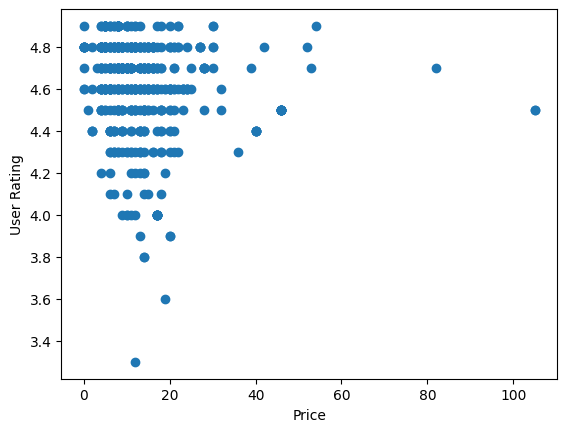

In [15]:
scatter=plt.scatter(df['Price'],df['User Rating'])
plt.xlabel('Price')
plt.ylabel('User Rating')
plt.show()

Average rating by genre.

In [16]:
average_rating=df.groupby('Genre')['User Rating'].mean()
print(average_rating.round(2))

Genre
Fiction        4.65
Non Fiction    4.60
Name: User Rating, dtype: float64


Count of books per year (bar chart).

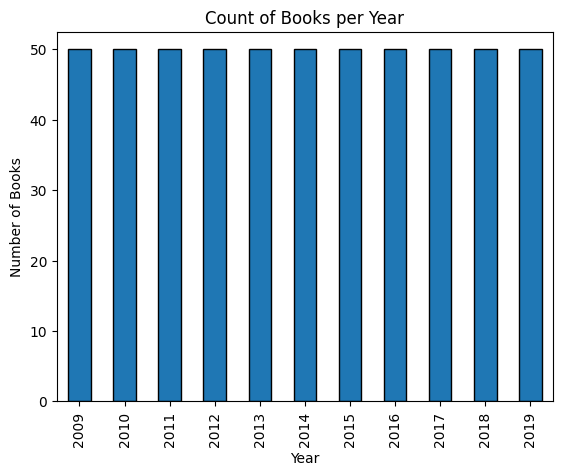

In [17]:
books_per_year = df["Year"].value_counts().sort_index()
books_per_year.plot(kind="bar",edgecolor="black")
plt.title("Count of Books per Year")
plt.xlabel("Year")
plt.ylabel("Number of Books")
plt.show()

Part 3 – Statistics

Calculate mean, median, and mode of Price.

In [18]:
mean=df['Price'].mean()
print("Mean:",mean)
median=df['Price'].median()
print("Median:",median)
mode=df['Price'].mode()
print("Mode:",mode)

Mean: 13.1
Median: 11.0
Mode: 0    8
Name: Price, dtype: int64


Find variance and standard deviation of User Rating.

In [19]:
variance=df['User Rating'].var()
print("Variance:",round(variance,2))
std=df['User Rating'].std()
print("Standard Deviation:",round(std,2))


Variance: 0.05
Standard Deviation: 0.23


Correlation between Price and User Rating.

In [20]:
correlation=df['Price'].corr(df['User Rating'])
print("Correlation:",round(correlation,2))

Correlation: -0.13


Percentage of books priced above $20.

In [21]:
percentage=(df['Price']>20).mean()*100
print("Percentage of books priced above $20:",round(percentage,2),"%")

Percentage of books priced above $20: 12.36 %


Most common User Rating value.


In [22]:
most_common=df['User Rating'].value_counts().idxmax()
print("Most common User Rating value:",most_common)

Most common User Rating value: 4.8


Part 4 – Linear Algebra & NumPy

Create NumPy arrays for Price and User Rating.

In [23]:
import numpy as np
price=np.array(df['Price'])
user_rating=np.array(df['User Rating'])

Perform vector addition and subtraction.

In [24]:
np.set_printoptions(suppress=True)
addition=np.add(price,user_rating)
subtraction = np.subtract(price,user_rating)
print("Addition:",addition)
print("Subtraction:",subtraction)


Addition: [ 12.7  26.6  19.7  10.7  16.8  15.4  34.7  19.7   7.7  12.6  12.6   6.6
  36.6   9.5  21.6   8.5  10.6  10.4  12.5  17.8  18.6  18.6  16.9  13.6
  17.3   9.6  13.7  18.2   9.6  15.6  28.8  25.7  15.8  15.8  19.8  17.7
  17.7  22.7  17.6  12.5   9.9   9.9   4.8   8.6  22.8  32.5  15.7  15.7
  15.7  20.7  18.7  18.7  18.7  12.3   8.8   9.8  15.6  15.6  14.8  17.4
   8.6  12.3   8.2   9.8   9.8   9.8   9.8  21.6  19.6 109.5 109.5   4.8
  19.8  26.8   9.6  19.6  19.6  10.5  10.6  17.7  16.8  10.9  12.9   8.9
   8.9  12.9  12.9  10.9  24.8   9.6  20.5   5.5  18.3  13.5  13.5  11.7
  22.7  19.7  19.7  13.7  12.6  12.6  19.7   6.4  11.4  15.5  17.8  17.8
  36.5  10.2   8.7   8.7   8.7   8.7   8.7  13.4   4.7  13.4   9.6   9.6
   9.6  24.5  20.6   8.8   8.8   8.8   8.8   8.8  16.6  16.6  16.6  15.6
  22.6  13.8  10.6  14.   14.   13.   10.6  18.5  18.5  18.5  18.5   9.8
   9.8   9.8  11.9  11.9  14.6  18.4  11.8  58.9  15.8  34.9  16.   22.9
  34.9  26.9  13.7  56.8   8.8  14.7  14.

Compute the dot product of these arrays.

In [25]:
dot_product=np.dot(price,user_rating)
cross_product=np.cross(price[:3],user_rating[:3])
print(dot_product.round(2))
print(cross_product)

33095.5
[ 34.4  32.9 -66.6]


Create a matrix [Price, User Rating] and multiply by weights [0.7, 0.3].

In [26]:
matrix=np.array([price, user_rating])
weights=np.array([0.7, 0.3])
result=np.dot(weights, matrix)
print(result)

[ 7.01 16.78 11.91  5.61  9.84  9.02 22.41 11.91  3.51  6.98  6.98  2.78
 23.78  4.85 13.28  4.15  5.58  5.52  6.95 10.54 11.18 11.18 10.27  7.68
 10.39  4.88  7.71 11.06  4.88  9.08 18.24 16.11  9.14  9.14 11.94 10.51
 10.51 14.01 10.48  6.95  4.97  4.97  1.44  4.18 14.04 20.95  9.11  9.11
  9.11 12.61 11.21 11.21 11.21  6.89  4.24  4.94  9.08  9.08  8.44 10.42
  4.18  6.89  4.06  4.94  4.94  4.94  4.94 13.28 11.88 74.85 74.85  1.44
 11.94 16.84  4.88 11.88 11.88  5.55  5.58 10.51  9.84  5.67  7.07  4.27
  4.27  7.07  7.07  5.67 15.44  4.88 12.55  2.05 11.09  7.65  7.65  6.31
 14.01 11.91 11.91  7.71  6.98  6.98 11.91  2.72  6.22  9.05 10.94 10.94
 23.75  5.46  4.21  4.21  4.21  4.21  4.21  7.62  1.41  7.62  4.88  4.88
  4.88 15.35 12.58  4.24  4.24  4.24  4.24  4.24  9.78  9.78  9.78  9.08
 14.38  7.74  5.58  8.2   8.2   7.5   5.58 11.15 11.15 11.15 11.15  4.94
  4.94  4.94  6.37  6.37  8.38 11.12  6.34 39.27  9.14 22.47  9.6  14.07
 22.47 16.87  7.71 37.84  4.24  8.41  8.41 11.12 11

Normalize the Price array.

In [27]:
normalized_price=(price-np.mean(price))/np.std(price)
print(normalized_price.round(2))

[-0.47  0.82  0.18 -0.66 -0.1  -0.19  1.56  0.18 -0.93 -0.47 -0.47 -1.02
  1.74 -0.75  0.36 -0.84 -0.66 -0.66 -0.47 -0.01  0.08  0.08 -0.01 -0.38
 -0.01 -0.75 -0.38  0.08 -0.75 -0.19  1.01  0.73 -0.19 -0.19  0.18 -0.01
 -0.01  0.45 -0.01 -0.47 -0.75 -0.75 -1.21 -0.84  0.45  1.38 -0.19 -0.19
 -0.19  0.27  0.08  0.08  0.08 -0.47 -0.84 -0.75 -0.19 -0.19 -0.29 -0.01
 -0.84 -0.47 -0.84 -0.75 -0.75 -0.75 -0.75  0.36  0.18  8.48  8.48 -1.21
  0.18  0.82 -0.75  0.18  0.18 -0.66 -0.66 -0.01 -0.1  -0.66 -0.47 -0.84
 -0.84 -0.47 -0.47 -0.66  0.64 -0.75  0.27 -1.12  0.08 -0.38 -0.38 -0.56
  0.45  0.18  0.18 -0.38 -0.47 -0.47  0.18 -1.02 -0.56 -0.19  0.08  0.08
  1.74 -0.66 -0.84 -0.84 -0.84 -0.84 -0.84 -0.38 -1.21 -0.38 -0.75 -0.75
 -0.75  0.64  0.27 -0.84 -0.84 -0.84 -0.84 -0.84 -0.1  -0.1  -0.1  -0.19
  0.54 -0.38 -0.66 -0.29 -0.29 -0.38 -0.66  0.08  0.08  0.08  0.08 -0.75
 -0.75 -0.75 -0.56 -0.56 -0.29  0.08 -0.56  3.78 -0.19  1.56 -0.1   0.45
  1.56  0.82 -0.38  3.59 -0.84 -0.29 -0.29  0.08  0

Part 5 – Calculus

In [28]:
import sympy as sp
Price=sp.symbols('Price')
UserRating=sp.symbols('UserRating')
Reviews=sp.symbols('Reviews')
popularity_index=(UserRating*Reviews)+0.5*(Price-10)**2
derivative=sp.diff(popularity_index,Price)
print(derivative)

1.0*Price - 10.0


Part 6 – Feature Engineering

In [29]:
# is_expensive = 1 if Price > 20 else 0
df['is_expensive']=( df['Price']>20 ).astype(int)
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre,is_expensive
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,0
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,1
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,0
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,0
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,0


Create high_rating = 1 if User Rating ≥ 4.8 else 0.

In [30]:
df['high_rating']=(df['User Rating']>=4.8).astype(int)
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre,is_expensive,high_rating
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,0,0
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,1,0
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,0,0
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,0,0
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,0,1


Create reviews_per_dollar = Reviews / Price.

In [31]:
df['reviews_per_dollar']=df['Reviews']/df['Price']
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre,is_expensive,high_rating,reviews_per_dollar
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,0,0,2168.750000
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,1,0,93.272727
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,0,0,1265.266667
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,0,0,3570.666667
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,0,1,638.750000


Create year_category = Old (2009–2013), Mid (2014–2016), Recent (2017–2019).

In [32]:
df['year_category'] = pd.cut(df['Year'], bins=[2009, 2013, 2016, 2019], labels=['Old','Mid','Recent'])
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre,is_expensive,high_rating,reviews_per_dollar,year_category
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,0,0,2168.750000,Mid
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,1,0,93.272727,Old
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,0,0,1265.266667,Recent
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,0,0,3570.666667,Recent
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,0,1,638.750000,Recent


Part 7 – SQL Simulation in Pandas

In [33]:
selected_books=df[df['Price']>20&(df['User Rating']>=4.8)]
selected_books.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre,is_expensive,high_rating,reviews_per_dollar,year_category
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,0,0,2168.750000,Mid
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,1,0,93.272727,Old
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,0,0,1265.266667,Recent
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,0,0,3570.666667,Recent
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,0,1,638.750000,Recent


Select all books with Price > 20 and User Rating ≥ 4.8.

In [34]:
sorted_books=df.sort_values(by='Reviews',ascending=False)
sorted_books.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre,is_expensive,high_rating,reviews_per_dollar,year_category
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction,0,1,5856.066667,Recent
382,The Girl on the Train,Paula Hawkins,4.1,79446,18,2015,Fiction,0,0,4413.666667,Mid
383,The Girl on the Train,Paula Hawkins,4.1,79446,7,2016,Fiction,0,0,11349.428571,Mid
33,Becoming,Michelle Obama,4.8,61133,11,2019,Non Fiction,0,1,5557.545455,Recent
32,Becoming,Michelle Obama,4.8,61133,11,2018,Non Fiction,0,1,5557.545455,Recent


Group by Genre and calculate average User Rating.

In [35]:
group_by=df.groupby('Genre')['User Rating'].mean()
group_by.head()

Genre
Fiction        4.648333
Non Fiction    4.595161
Name: User Rating, dtype: float64

Get top 5 authors by number of books.

In [36]:
group_by=df['Author'].value_counts()
group_by.head(5)

Author
Jeff Kinney                           12
Suzanne Collins                       11
Gary Chapman                          11
Rick Riordan                          11
American Psychological Association    10
Name: count, dtype: int64

Count books with Reviews > 10,000.

In [37]:
count_books=df[df['Reviews']>10000]['Reviews'].count()
print(count_books)

225


Part 8 – Insights

Do Fiction books have higher ratings than Non Fiction books?

In [38]:
average_rating=df.groupby('Genre')['User Rating'].mean()
print(average_rating)

Genre
Fiction        4.648333
Non Fiction    4.595161
Name: User Rating, dtype: float64


Are expensive books always highly rated?

In [39]:
correlation = df['Price'].corr(df['User Rating'])
print("Correlation between Price and Rating:", correlation)

Correlation between Price and Rating: -0.1330862872808798


In [40]:
year_counts=df['Year'].value_counts()
most_bestsellers_year=year_counts.idxmax()
most_bestsellers_count=year_counts.max()
print(f"The year with the most bestsellers is {most_bestsellers_year} with {most_bestsellers_count} books.")


The year with the most bestsellers is 2016 with 50 books.


In [41]:
top_books = df[df['User Rating'] >= df['User Rating'].quantile(0.75)]['Name']
print(top_books.to_string(index=False))

5,000 Awesome Facts (About Everything!) (Nation...
                                Alexander Hamilton
Barefoot Contessa Foolproof: Recipes You Can Tr...
                                          Becoming
                                          Becoming
Being Mortal: Medicine and What Matters in the End
          Brown Bear, Brown Bear, What Do You See?
          Brown Bear, Brown Bear, What Do You See?
        Cabin Fever (Diary of a Wimpy Kid, Book 6)
 Can't Hurt Me: Master Your Mind and Defy the Odds
Creative Haven Creative Cats Coloring Book (Adu...
Creative Haven Owls Coloring Book (Adult Coloring)
Daring Greatly: How the Courage to Be Vulnerabl...
                    Dear Zoo: A Lift-the-Flap Book
                    Dear Zoo: A Lift-the-Flap Book
                    Dear Zoo: A Lift-the-Flap Book
                    Dear Zoo: A Lift-the-Flap Book
           Diary of a Wimpy Kid: Hard Luck, Book 8
     Diary of a Wimpy Kid: The Last Straw (Book 3)
               Diary of a Wimpy

In [42]:
category_percent = (df['Genre'].value_counts() / len(df)) * 100
print(category_percent)
print("%")

Genre
Non Fiction    56.363636
Fiction        43.636364
Name: count, dtype: float64
%
